In [1]:
from pybaseball import statcast
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
import warnings
warnings.filterwarnings("ignore", message="X does not have valid feature names")

In [81]:
#savant_df2016 = statcast(start_dt = "2016-03-28", end_dt = "2016-11-15")

In [82]:
#savant_df2017 = statcast(start_dt = "2017-03-28", end_dt = "2017-11-15")

In [8]:
#savant_df2018 = statcast(start_dt = "2018-03-28", end_dt = "2018-11-15")

In [9]:
#savant_df2021 = statcast(start_dt = "2021-03-28", end_dt = "2021-11-15")

In [10]:
#savant_df2022 = statcast(start_dt = "2022-03-28", end_dt = "2022-11-15")

In [11]:
#expected = pd.concat([savant_df2016, savant_df2017, savant_df2018, savant_df2021, savant_df2022], axis = 0)

In [4]:
expected = pd.read_csv("Expected.csv")

#pd.set_option('display.max_columns', None)

expected

/var/folders/bs/6lp27nzn3wvg1ygrkwrcl96w0000gn/T/ipykernel_27817/1777417083.py:1: DtypeWarning: Columns (43) have mixed types. Specify dtype option on import or set low_memory=False.
  expected = pd.read_csv("Expected.csv")


,Pitch Type,game_date,release_speed,release_pos_x,RelHeight,Name,batter,pitcher,events,description,spin_dir,spin_rate_deprecated,break_angle_deprecated,break_length_deprecated,zone,des,game_type,stand,p_throws,home_team,away_team,type,hit_location,bb_type,balls,strikes,game_year,pfx_x,pfx_z,plate_x,plate_z,on_3b,on_2b,on_1b,outs_when_up,inning,inning_topbot,hc_x,hc_y,tfs_deprecated,tfs_zulu_deprecated,fielder_2,umpire,sv_id,vx0,vy0,vz0,ax,ay,az,sz_top,sz_bot,hit_distance_sc,launch_speed,launch_angle,effective_speed,release_spin_rate,release_extension,game_pk,pitcher.1,fielder_2.1,fielder_3,fielder_4,fielder_5,fielder_6,fielder_7,fielder_8,fielder_9,release_pos_y,estimated_ba_using_speedangle,estimated_woba_using_speedangle,woba_value,woba_denom,babip_value,iso_value,launch_speed_angle,at_bat_number,pitch_number,pitch_name,home_score,away_score,bat_score,fld_score,post_away_score,post_home_score,post_bat_score,post_fld_score,if_fielding_alignment,of_fielding_alignment,spin_axis,delta_home_win_exp,delta_run_exp,IVB,HB,ABS_HB,ABS_RelSide
0,CU,2016-11-02,76.6,2.93,6.59,Mike Montgomery,492841,543557,field_out,hit_into_play,NaN,NaN,NaN,NaN,3.0,"Michael Martinez grounds out softly, third bas...",W,R,L,CLE,CHC,X,5.0,ground_ball,0,1,2016,-0.78,-1.32,0.75,2.85,NaN,NaN,434658.0,2,10,Bot,112.98,177.44,NaN,NaN,471083,NaN,161103_005034,-2.971400,-112.375382,3.212320,-5.837,20.536,-43.549,3.37,1.56,2.0,70.4,-53.0,76.9,2324.0,6.2,487637.0,543557.0,471083.0,519203.0,595879.0,592178.0,608365.0,450314.0,451594.0,518792.0,54.5,0.113,0.102,0.0,1.0,0.0,0.0,2.0,89.0,2.0,Curveball,7.0,8.0,7.0,8.0,8.0,7.0,7.0,8.0,Standard,Standard,317.0,-0.096,-0.180,-15.84,-9.36,9.36,2.93
1,CU,2016-11-02,74.3,3.04,6.51,Mike Montgomery,492841,543557,NaN,called_strike,NaN,NaN,NaN,NaN,3.0,"Michael Martinez grounds out softly, third bas...",W,R,L,CLE,CHC,S,NaN,NaN,0,0,2016,-0.68,-1.29,0.43,2.64,NaN,NaN,434658.0,2,10,Bot,NaN,NaN,NaN,NaN,471083,NaN,161103_005016,-3.966784,-109.018497,3.286612,-4.543,19.370,-42.641,3.08,1.34,NaN,NaN,NaN,74.3,2478.0,6.0,487637.0,543557.0,471083.0,519203.0,595879.0,592178.0,608365.0,450314.0,451594.0,518792.0,54.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,89.0,1.0,Curveball,7.0,8.0,7.0,8.0,8.0,7.0,7.0,8.0,Standard,Standard,318.0,0.000,-0.040,-15.48,-8.16,8.16,3.04
2,FF,2016-11-02,94.9,-1.29,6.46,Carl Edwards Jr.,434658,605218,single,hit_into_play,NaN,NaN,NaN,NaN,8.0,Rajai Davis singles on a line drive to center ...,W,R,R,CLE,CHC,X,8.0,line_drive,1,0,2016,0.04,1.46,0.04,1.56,NaN,446386.0,NaN,2,10,Bot,122.11,107.98,NaN,NaN,471083,NaN,161103_004639,3.385197,-138.657741,-9.902501,-0.221,29.317,-11.776,3.30,1.48,254.0,98.7,9.0,96.3,2636.0,6.8,487637.0,605218.0,471083.0,519203.0,595879.0,592178.0,608365.0,450314.0,451594.0,518792.0,54.5,0.687,0.618,0.9,1.0,1.0,0.0,4.0,88.0,2.0,4-Seam Fastball,6.0,8.0,6.0,8.0,8.0,7.0,7.0,8.0,Standard,Standard,184.0,0.050,0.669,17.52,0.48,0.48,1.29
3,FF,2016-11-02,95.6,-1.28,6.51,Carl Edwards Jr.,434658,605218,NaN,ball,NaN,NaN,NaN,NaN,14.0,Rajai Davis singles on a line drive to center ...,W,R,R,CLE,CHC,B,NaN,NaN,0,0,2016,-0.18,1.47,0.40,1.04,NaN,NaN,446386.0,2,10,Bot,NaN,NaN,NaN,NaN,471083,NaN,161103_004618,4.883507,-139.407469,-11.639133,-3.197,25.774,-11.146,2.95,1.38,NaN,NaN,NaN,97.2,2672.0,6.8,487637.0,605218.0,471083.0,519203.0,595879.0,592178.0,608365.0,450314.0,451594.0,518792.0,54.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,88.0,1.0,4-Seam Fastball,6.0,8.0,6.0,8.0,8.0,6.0,6.0,8.0,Standard,Standard,191.0,0.002,0.031,17.64,-2.16,2.16,1.28
4,FF,2016-11-02,94.8,-1.13,6.30,Carl Edwards Jr.,446386,605218,walk,ball,NaN,NaN,NaN,NaN,14.0,Brandon Guyer walks.,W,R,R,CLE,CHC,B,NaN,NaN,3,1,2016,0.23,1.21,0.16,0.78,NaN,NaN,NaN,2,10,Bot,NaN,NaN,NaN,NaN,471083,NaN,161103_004459,2.757214,-138.305091,-10.905638,2.476,23.633,-15.029,3.25,1.51,NaN,NaN,NaN,96.8,2712.0,6.7,487637.0,605218.0,471083.0,519203.0,595879.0,592178.0,608365.0,450314.0,451594.0,518792.0,54.5,NaN,NaN,0.7,1.0,0.0,0.0,NaN,87.0,5.0,4-Seam Fastball,6.0,8.0,6.0,8.0,8.0,6.0,6.0,8.0,Standard

In [4]:
# Converts the Induced Vertical Break and Horizontal Break to inches from feet
expected['IVB'] = expected['pfx_z'] * 12
expected['HB'] = expected['pfx_x'] * 12
expected['ABS_HB'] = np.abs(expected["HB"])
expected['ABS_RelSide'] = np.abs(expected["release_pos_x"])

expected = expected.rename(columns={'player_name': 'Name', "Pitch Type" : "PitchType", "release_pos_x" : "RelSide", "release_pos_z" : "RelHeight"})
expected

,PitchType,game_date,release_speed,RelSide,RelHeight,Name,batter,pitcher,events,description,...,post_fld_score,if_fielding_alignment,of_fielding_alignment,spin_axis,delta_home_win_exp,delta_run_exp,IVB,HB,ABS_HB,ABS_RelSide
0,CU,2016-11-02,76.6,2.93,6.59,Mike Montgomery,492841,543557,field_out,hit_into_play,...,8.0,Standard,Standard,317.0,-0.096,-0.180,-15.84,-9.36,9.36,2.93
1,CU,2016-11-02,74.3,3.04,6.51,Mike Montgomery,492841,543557,NaN,called_strike,...,8.0,Standard,Standard,318.0,0.000,-0.040,-15.48,-8.16,8.16,3.04
2,FF,2016-11-02,94.9,-1.29,6.46,Carl Edwards Jr.,434658,605218,single,hit_into_play,...,8.0,Standard,Standard,184.0,0.050,0.669,17.52,0.48,0.48,1.29
3,FF,2016-11-02,95.6,-1.28,6.51,Carl Edwards Jr.,434658,605218,NaN,ball,...,8.0,Standard,Standard,191.0,0.002,0.031,17.64,-2.16,2.16,1.28
4,FF,2016-11-02,94.8,-1.13,6.30,Carl Edwards Jr.,446386,605218,walk,ball,...,8.0,Standard,Standard,185.0,0.030,0.067,14.52,2.76,2.76,1.13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3658661,NaN,2022-03-28,NaN,NaN,NaN,Patrick Corbin,621563,571578,NaN,ball,...,0.0,NaN,NaN,NaN,0.000,NaN,NaN,NaN,NaN,NaN
3658662,NaN,2022-03-28,NaN,NaN,NaN,Patrick Corbin,621563,571578,NaN,ball,...,0.0,NaN,NaN,NaN,0.000,NaN,NaN,NaN,NaN,NaN
3658663,NaN,2022-03-28,NaN,NaN,NaN,Patrick Corbin,624585,571578,strikeout,swinging_strike,...,0.0,NaN,NaN,NaN,0.022,NaN,NaN,NaN,NaN,NaN
3658664,NaN,2022-03-28,NaN,NaN,NaN,Patrick Corbin,624585,571578,NaN,swinging_strike,...,0.0,NaN,NaN,NaN,0.000,NaN,NaN,NaN,NaN,NaN


In [5]:
df_swing = expected[expected['description'].isin(['swinging_strike', 'swinging_strike_blocked', 'hit_into_play', 'foul'])]
df_swing

,PitchType,game_date,release_speed,RelSide,RelHeight,Name,batter,pitcher,events,description,...,post_fld_score,if_fielding_alignment,of_fielding_alignment,spin_axis,delta_home_win_exp,delta_run_exp,IVB,HB,ABS_HB,ABS_RelSide
0,CU,2016-11-02,76.6,2.93,6.59,Mike Montgomery,492841,543557,field_out,hit_into_play,...,8.0,Standard,Standard,317.0,-0.096,-0.180,-15.84,-9.36,9.36,2.93
2,FF,2016-11-02,94.9,-1.29,6.46,Carl Edwards Jr.,434658,605218,single,hit_into_play,...,8.0,Standard,Standard,184.0,0.050,0.669,17.52,0.48,0.48,1.29
9,CU,2016-11-02,81.3,-0.98,6.39,Carl Edwards Jr.,608070,605218,field_out,hit_into_play,...,8.0,Standard,Standard,44.0,-0.029,-0.144,-11.88,13.92,13.92,0.98
12,CU,2016-11-02,82.4,-1.17,6.30,Carl Edwards Jr.,608070,605218,NaN,foul,...,8.0,Standard,Standard,51.0,0.000,-0.037,-12.72,12.96,12.96,1.17
14,FF,2016-11-02,95.2,-1.16,6.37,Carl Edwards Jr.,435063,605218,strikeout,swinging_strike,...,8.0,Standard,Standard,165.0,-0.044,-0.208,14.04,5.28,5.28,1.16
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3658657,NaN,2022-03-28,NaN,NaN,NaN,Edward Cabrera,514917,665795,field_out,hit_into_play,...,0.0,NaN,NaN,NaN,-0.021,NaN,NaN,NaN,NaN,NaN
3658658,NaN,2022-03-28,NaN,NaN,NaN,Patrick Corbin,643265,571578,grounded_into_double_play,hit_into_play,...,0.0,NaN,NaN,NaN,0.050,NaN,NaN,NaN,NaN,NaN
3658663,NaN,2022-03-28,NaN,NaN,NaN,Patrick Corbin,624585,571578,strikeout,swinging_strike,...,0.0,NaN,NaN,NaN,0.022,NaN,NaN,NaN,NaN,NaN
3658664,NaN,2022-03-28,NaN,NaN,NaN,Patrick Corbin,624585,571578,NaN,swinging_strike,...,0.0,NaN,NaN,NaN,0.000,NaN,NaN,NaN,NaN,NaN


In [6]:
df_swing['Whiff'] = df_swing['description'].apply(lambda x: 1 if x == 'swinging_strike' else 0)
df_swing

/var/folders/bs/6lp27nzn3wvg1ygrkwrcl96w0000gn/T/ipykernel_5975/3217903474.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_swing['Whiff'] = df_swing['description'].apply(lambda x: 1 if x == 'swinging_strike' else 0)


,PitchType,game_date,release_speed,RelSide,RelHeight,Name,batter,pitcher,events,description,...,if_fielding_alignment,of_fielding_alignment,spin_axis,delta_home_win_exp,delta_run_exp,IVB,HB,ABS_HB,ABS_RelSide,Whiff
0,CU,2016-11-02,76.6,2.93,6.59,Mike Montgomery,492841,543557,field_out,hit_into_play,...,Standard,Standard,317.0,-0.096,-0.180,-15.84,-9.36,9.36,2.93,0
2,FF,2016-11-02,94.9,-1.29,6.46,Carl Edwards Jr.,434658,605218,single,hit_into_play,...,Standard,Standard,184.0,0.050,0.669,17.52,0.48,0.48,1.29,0
9,CU,2016-11-02,81.3,-0.98,6.39,Carl Edwards Jr.,608070,605218,field_out,hit_into_play,...,Standard,Standard,44.0,-0.029,-0.144,-11.88,13.92,13.92,0.98,0
12,CU,2016-11-02,82.4,-1.17,6.30,Carl Edwards Jr.,608070,605218,NaN,foul,...,Standard,Standard,51.0,0.000,-0.037,-12.72,12.96,12.96,1.17,0
14,FF,2016-11-02,95.2,-1.16,6.37,Carl Edwards Jr.,435063,605218,strikeout,swinging_strike,...,Standard,Standard,165.0,-0.044,-0.208,14.04,5.28,5.28,1.16,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3658657,NaN,2022-03-28,NaN,NaN,NaN,Edward Cabrera,514917,665795,field_out,hit_into_play,...,NaN,NaN,NaN,-0.021,NaN,NaN,NaN,NaN,NaN,0
3658658,NaN,2022-03-28,NaN,NaN,NaN,Patrick Corbin,643265,571578,grounded_into_double_play,hit_into_play,...,NaN,NaN,NaN,0.050,NaN,NaN,NaN,NaN,NaN,0
3658663,NaN,2022-03-28,NaN,NaN,NaN,Patrick Corbin,624585,571578,strikeout,swinging_strike,...,NaN,NaN,NaN,0.022,NaN,NaN,NaN,NaN,NaN,1
3658664,NaN,2022-03-28,NaN,NaN,NaN,Patrick Corbin,624585,571578,NaN,swinging_strike,...,NaN,NaN,NaN,0.000,NaN,NaN,NaN,NaN,NaN,1


In [7]:
df_swing = df_swing[["Name", "PitchType", "release_speed", "release_spin_rate", "IVB", "ABS_HB", "RelHeight", "ABS_RelSide", "release_extension", "delta_run_exp", "Whiff", "RelSide", "HB", "plate_x", "plate_z"]].dropna()
df_swing

,Name,PitchType,release_speed,release_spin_rate,IVB,ABS_HB,RelHeight,ABS_RelSide,release_extension,delta_run_exp,Whiff,RelSide,HB,plate_x,plate_z
0,Mike Montgomery,CU,76.6,2324.0,-15.84,9.36,6.59,2.93,6.2,-0.180,0,2.93,-9.36,0.75,2.85
2,Carl Edwards Jr.,FF,94.9,2636.0,17.52,0.48,6.46,1.29,6.8,0.669,0,-1.29,0.48,0.04,1.56
9,Carl Edwards Jr.,CU,81.3,2468.0,-11.88,13.92,6.39,0.98,6.4,-0.144,0,-0.98,13.92,-1.20,2.10
12,Carl Edwards Jr.,CU,82.4,2695.0,-12.72,12.96,6.30,1.17,5.4,-0.037,0,-1.17,12.96,0.47,1.54
14,Carl Edwards Jr.,FF,95.2,2703.0,14.04,5.28,6.37,1.16,6.9,-0.208,1,-1.16,5.28,1.71,2.10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3634013,Shohei Ohtani,FF,97.7,2090.0,8.28,1.80,5.94,1.83,7.0,-0.284,0,-1.83,-1.80,0.38,1.67
3634014,Shohei Ohtani,FS,90.4,1253.0,4.32,5.16,6.06,1.79,6.9,0.000,0,-1.79,-5.16,-1.14,3.07
3634015,Shohei Ohtani,FF,98.2,2190.0,12.84,0.48,5.90,1.88,6.9,-0.070,0,-1.88,-0.48,0.26,1.83
3634016,Shohei Ohtani,FF,97.8,1981.0,11.28,2.40,5.90,1.88,6.8,-0.058,0,-1.88,-2.40,-0.54,2.81


In [8]:
df_swing.loc[df_swing['PitchType'] == 'SI', 'PitchType'] = 'Sinker'
df_swing.loc[df_swing['PitchType'] == 'FC', 'PitchType'] = 'Cutter'
df_swing.loc[df_swing['PitchType'] == 'FF', 'PitchType'] = 'FourSeam'
df_swing.loc[df_swing['PitchType'] == 'CH', 'PitchType'] = 'Changeup'
df_swing.loc[df_swing["PitchType"].isin(['FS', 'FO', 'SP']), 'PitchType'] = 'Splitter'
df_swing.loc[df_swing["PitchType"].isin(['CU', 'KC']), 'PitchType'] = 'Curveball'
df_swing.loc[df_swing["PitchType"].isin(['SL', 'SV']), 'PitchType'] = 'Slider'
df_swing.loc[df_swing['PitchType'] == 'ST', 'PitchType'] = 'Sweeper'


In [9]:
df_sinker = df_swing[df_swing["PitchType"] == "Sinker"]
df_cutter = df_swing[df_swing["PitchType"] == "Cutter"]
df_fastball = df_swing[df_swing["PitchType"] == "FourSeam"]
df_changeup = df_swing[df_swing["PitchType"] == "Changeup"]
df_splitter = df_swing[df_swing["PitchType"] == "Splitter"]
df_curveball = df_swing[df_swing["PitchType"] == "Curveball"]
df_slider = df_swing[df_swing["PitchType"] == "Slider"]
df_sweeper = df_swing[df_swing["PitchType"] == "Sweeper"]

## Sinker

In [10]:
SIfeature = df_sinker.drop(["Name", "PitchType", "Whiff", "RelSide", "HB", "plate_x", "plate_z"], axis=1)
SIlabel = df_sinker['Whiff']

SIrf = RandomForestRegressor(n_estimators = 250, random_state = 42).fit(SIfeature, SIlabel)

KeyboardInterrupt: 

In [11]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV, train_test_split

# Assuming df_sinker contains your dataset
SIfeature = df_sinker.drop(["Name", "PitchType", "Whiff", "RelSide", "HB", "plate_x", "plate_z"], axis=1)
SIlabel = df_sinker['Whiff']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(SIfeature, SIlabel, test_size=0.2, random_state=42)

# Define the parameter grid to search
param_grid = {
    'n_estimators': [50, 100]  # Adjust the values as needed
    # Add other hyperparameters to tune if desired
}

# Create the RandomForestRegressor
rf_model = RandomForestRegressor(random_state=42)

# Create the GridSearchCV object
grid_search = GridSearchCV(rf_model, param_grid, cv=5, scoring='neg_mean_squared_error')

# Fit the model with the training data
grid_search.fit(X_train, y_train)

# Get the best parameters and the best estimator
best_params = grid_search.best_params_
best_estimator = grid_search.best_estimator_

# Evaluate the model on the test set
mse = -grid_search.score(X_test, y_test)

print("Best Parameters:", best_params)
print("Test MSE:", mse)

Best Parameters: {'n_estimators': 100}
Test MSE: 0.10397510008554321


In [134]:
league1 = league[league["PitchType"] == "Sinker"]
league1.dropna(subset=["release_speed", "release_spin_rate", "IVB", "ABS_HB", "RelHeight", "ABS_RelSide", "release_extension", "delta_run_exp"], inplace=True)
league1

/var/folders/bs/6lp27nzn3wvg1ygrkwrcl96w0000gn/T/ipykernel_62774/1094784706.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  league1.dropna(subset=["release_speed", "release_spin_rate", "IVB", "ABS_HB", "RelHeight", "ABS_RelSide", "release_extension", "delta_run_exp"], inplace=True)


,game_date,league,pitcher_team,Name,PitchType,release_speed,release_spin_rate,IVB,ABS_HB,RelHeight,ABS_RelSide,release_extension,RelSide,HB,plate_x,plate_z,launch_speed,estimated_woba_using_speedangle,delta_run_exp,description
28,2023-10-01,NL,MIL,Janson Junk,Sinker,94.8,2046,14.04,12.48,5.42,1.42,6.6,-1.42,-12.48,-0.1,2.61,104.5,0.834,0.289,hit_into_play
38,2023-10-01,NL,CHC,Shane Greene,Sinker,93.3,2267,3.12,16.32,5.64,2.43,6.4,-2.43,-16.32,-0.09,2.35,77.6,0.09,-0.807,hit_into_play
49,2023-10-01,NL,CHC,Shane Greene,Sinker,92.7,2078,6.96,13.08,5.59,2.57,6.6,-2.57,-13.08,-1.18,2.87,<NA>,<NA>,0.088,ball
64,2023-10-01,NL,MIL,Andrew Chafin,Sinker,92.6,2006,10.92,12.6,6.21,2.02,7.1,2.02,12.6,0.02,2.84,80.5,0.018,-0.238,hit_into_play
71,2023-10-01,NL,CHC,Tyler Duffey,Sinker,92.7,2419,3.96,12.72,5.62,2.89,6.6,-2.89,-12.72,-0.99,3.13,107.6,2.004,0.984,hit_into_play
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
355514,2023-03-30,NL,LAD,Yency Almonte,Sinker,94.4,2019,6.36,18.84,5.74,1.32,6.9,-1.32,-18.84,-0.48,2.08,<NA>,<NA>,-0.038,called_strike
355521,2023-03-30,NL,AZ,Kevin Ginkel,Sinker,93.5,2170,8.28,16.68,6.36,2.25,7.1,-2.25,-16.68,-1.01,1.83,90.0,<NA>,0.0,foul
355523,2023-03-30,NL,AZ,Kevin Ginkel,Sinker,93.4,2257,11.16,17.76,6.39,2.28,7.1,-2.28,-17.76,-1.1,2.55,88.4,<NA>,-0.151,foul
355525,2023-03-30,NL,AZ,Kevin Ginkel,Sinker,92.5,2222,10.56,17.28,6.27,2.45,7.0,-2.45,-17.28,-0.92,2.47,90.1,<NA>,-0.139,foul


In [138]:
stuff = league1.drop(["game_date", "league", "pitcher_team", "Name", "PitchType", "RelSide", "HB", "plate_x", "plate_z", "launch_speed", "estimated_woba_using_speedangle", "description"], axis = 1)
stuff

,release_speed,release_spin_rate,IVB,ABS_HB,RelHeight,ABS_RelSide,release_extension,delta_run_exp,StuffPlus
28,94.8,2046,14.04,12.48,5.42,1.42,6.6,0.289,0.000000
38,93.3,2267,3.12,16.32,5.64,2.43,6.4,-0.807,12.124355
49,92.7,2078,6.96,13.08,5.59,2.57,6.6,0.088,0.000000
64,92.6,2006,10.92,12.6,6.21,2.02,7.1,-0.238,39.404154
71,92.7,2419,3.96,12.72,5.62,2.89,6.6,0.984,0.000000
...,...,...,...,...,...,...,...,...,...
355514,94.4,2019,6.36,18.84,5.74,1.32,6.9,-0.038,263.704722
355521,93.5,2170,8.28,16.68,6.36,2.25,7.1,0.0,0.000000
355523,93.4,2257,11.16,17.76,6.39,2.28,7.1,-0.151,233.393834
355525,92.5,2222,10.56,17.28,6.27,2.45,7.0,-0.139,330.388674


In [139]:
predictions = SIrf.predict(stuff.values)

# Calculate the scaling factor
scaling_factor = np.sum(df_sinker["Whiff"] == 1) / len(df_sinker["Whiff"])

# Update the "StuffPlus" column in league1
league1["StuffPlus"] = predictions / scaling_factor * 100

ValueError: X has 9 features, but RandomForestRegressor is expecting 8 features as input.

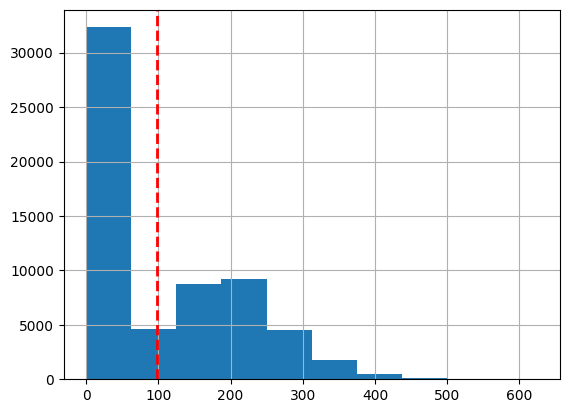

39.404


In [140]:
league1[league1["PitchType"] == "Sinker"]["StuffPlus"].hist()

plt.axvline(np.mean(league1[league1["PitchType"] == "Sinker"]["StuffPlus"]), color='red', linestyle='dashed', linewidth=2, label='Median')
plt.show()

print(np.median(league1[league1["PitchType"] == "Sinker"]["StuffPlus"]).round(3))

## Cutter

In [11]:
CTfeature = df_cutter.drop(["Name", "PitchType", "Whiff", "RelSide", "HB", "plate_x", "plate_z"], axis=1)
CTlabel = df_cutter['Whiff']

CTrf = RandomForestRegressor(n_estimators = 15, random_state = 42).fit(CTfeature, CTlabel)

## 4-Seam

In [12]:
FBfeature = df_fastball.drop(["Name", "PitchType", "Whiff", "RelSide", "HB", "plate_x", "plate_z"], axis=1)
FBlabel = df_fastball['Whiff']

FBrf = RandomForestRegressor(n_estimators = 30, random_state = 42).fit(FBfeature, FBlabel)

## Changeup

In [13]:
CHfeature = df_changeup.drop(["Name", "PitchType", "Whiff", "RelSide", "HB", "plate_x", "plate_z"], axis=1)
CHlabel = df_changeup['Whiff']

CHrf = RandomForestRegressor(n_estimators = 15, random_state = 42).fit(CHfeature, CHlabel)

## Splitter

In [14]:
SPfeature = df_splitter.drop(["Name", "PitchType", "Whiff", "RelSide", "HB", "plate_x", "plate_z"], axis=1)
SPlabel = df_splitter['Whiff']

SPrf = RandomForestRegressor(n_estimators = 10, random_state = 42).fit(SPfeature, SPlabel)

## Curveball

In [15]:
CUfeature = df_curveball.drop(["Name", "PitchType", "Whiff", "RelSide", "HB", "plate_x", "plate_z"], axis=1)
CUlabel = df_curveball['Whiff']

CUrf = RandomForestRegressor(n_estimators = 20, random_state = 42).fit(CUfeature, CUlabel)

## Slider

In [17]:
SLfeature = df_slider.drop(["Name", "PitchType", "Whiff", "RelSide", "HB", "plate_x", "plate_z"], axis=1)
SLlabel = df_slider['Whiff']

SLrf = RandomForestRegressor(n_estimators = 25, random_state = 42).fit(SLfeature, SLlabel)

## Sweeper

In [18]:
STfeature = df_sweeper.drop(["Name", "PitchType", "Whiff", "RelSide", "HB", "plate_x", "plate_z"], axis=1)
STlabel = df_sweeper['Whiff']

STrf = RandomForestRegressor(n_estimators = 10, random_state = 42).fit(STfeature, STlabel)

## 2023 DF

In [101]:
savant_df = statcast(start_dt = "2023-03-30", end_dt = "2023-10-02")

savant_df['IVB'] = savant_df['pfx_z'] * 12
savant_df['HB'] = savant_df['pfx_x'] * 12
savant_df['ABS_HB'] = np.abs(savant_df["HB"])
savant_df['ABS_RelSide'] = np.abs(savant_df["release_pos_x"])

savant_df = savant_df.rename(columns={'player_name': 'Name', "pitch_type" : "PitchType", "release_pos_x" : "RelSide", "release_pos_z" : "RelHeight"})

def flip_names(name):
    first_name, last_name = name.split(", ")
    return f"{last_name} {first_name}"

savant_df['Name'] = savant_df["Name"].apply(flip_names)

savant_df['pitcher_team'] = savant_df.apply(lambda row: row['home_team'] if row['inning_topbot'] == 'Top' else row['away_team'], axis=1)

nl_teams = ["ATL", "NYM", "MIA", "PHI", "WSH", "CHC", "CIN", "MIL", "PIT", "STL", "LAD", "AZ", "SF", "SD", "COL"]
savant_df["league"] = np.where(savant_df["pitcher_team"].isin(nl_teams), "NL", "AL")

savant_df.loc[savant_df['PitchType'] == 'SI', 'PitchType'] = 'Sinker'
savant_df.loc[savant_df['PitchType'] == 'FC', 'PitchType'] = 'Cutter'
savant_df.loc[savant_df['PitchType'] == 'FF', 'PitchType'] = 'FourSeam'
savant_df.loc[savant_df['PitchType'] == 'CH', 'PitchType'] = 'Changeup'
savant_df.loc[savant_df["PitchType"].isin(['FS', 'FO', 'SP']), 'PitchType'] = 'Splitter'
savant_df.loc[savant_df["PitchType"].isin(['CU', 'KC']), 'PitchType'] = 'Curveball'
savant_df.loc[savant_df["PitchType"].isin(['SL', 'SV']), 'PitchType'] = 'Slider'
savant_df.loc[savant_df['PitchType'] == 'ST', 'PitchType'] = 'Sweeper'


savant_df = savant_df[["game_date", "league", "pitcher_team", "Name", "PitchType", "release_speed", "release_spin_rate", "IVB", "ABS_HB", "RelHeight", "ABS_RelSide", "release_extension", "RelSide", "HB", "plate_x", "plate_z", "launch_speed", "estimated_woba_using_speedangle", "delta_run_exp", "description"]]
savant_df.dropna(subset=["release_speed", "release_spin_rate", "IVB", "ABS_HB", "RelHeight", "ABS_RelSide", "release_extension", "delta_run_exp"], inplace=True)

savant_df

This is a large query, it may take a moment to complete


100%|██████████| 187/187 [01:12<00:00,  2.56it/s]


,game_date,league,pitcher_team,Name,PitchType,release_speed,release_spin_rate,IVB,ABS_HB,RelHeight,ABS_RelSide,release_extension,RelSide,HB,plate_x,plate_z,launch_speed,estimated_woba_using_speedangle,delta_run_exp,description
2432,2023-10-01,AL,BOS,Nick Robertson,Changeup,89.0,1703,3.96,18.36,5.59,2.8,7.4,-2.8,-18.36,0.33,2.01,96.4,0.121,-0.09,hit_into_play
2495,2023-10-01,AL,BOS,Nick Robertson,FourSeam,96.9,2153,16.32,9.12,5.9,2.4,7.4,-2.4,-9.12,0.09,2.71,78.2,<NA>,0.0,foul
2565,2023-10-01,AL,BOS,Nick Robertson,Changeup,90.0,1698,4.32,19.8,5.56,2.93,7.4,-2.93,-19.8,-0.24,0.53,<NA>,<NA>,0.016,ball
2693,2023-10-01,AL,BOS,Nick Robertson,Slider,82.2,2786,3.36,17.16,5.55,3.09,6.9,-3.09,17.16,0.81,0.49,<NA>,<NA>,0.009,ball
2787,2023-10-01,AL,BOS,Nick Robertson,Changeup,89.2,1589,3.72,17.88,5.58,2.87,7.2,-2.87,-17.88,-0.78,2.05,<NA>,<NA>,-0.023,swinging_strike
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3890,2023-03-30,AL,SEA,Luis Castillo,Sinker,95.3,2120,5.52,20.28,5.24,3.11,5.6,-3.11,-20.28,-0.99,2.71,<NA>,<NA>,-0.079,called_strike
4085,2023-03-30,AL,SEA,Luis Castillo,FourSeam,94.2,2284,13.92,15.36,5.29,3.16,5.6,-3.16,-15.36,-0.73,2.89,<NA>,<NA>,-0.078,called_strike
4133,2023-03-30,AL,SEA,Luis Castillo,FourSeam,94.8,2122,14.28,9.6,5.3,3.12,5.4,-3.12,-9.6,1.6,2.42,<NA>,<NA>,0.135,ball
4259,2023-03-30,AL,SEA,Luis Castillo,Sinker,95.1,2126,4.92,20.52,5.22,3.2,5.5,-3.2,-20.52,-1.31,2.23,<NA>,<NA>,0.064,ball


In [151]:
player = savant_df[savant_df["Name"] == "Corbin Burnes"].reset_index(drop = True)
player.dropna(subset=["release_speed", "release_spin_rate", "IVB", "ABS_HB", "RelHeight", "ABS_RelSide", "release_extension", "delta_run_exp"], inplace=True)
player

,league,pitcher_team,Name,PitchType,release_speed,release_spin_rate,IVB,ABS_HB,RelHeight,ABS_RelSide,release_extension,RelSide,HB,plate_x,plate_z,launch_speed,estimated_woba_using_speedangle,delta_run_exp,description
0,NL,MIL,Corbin Burnes,Cutter,94.7,2664,9.12,7.56,5.62,0.92,6.5,-0.92,7.56,0.47,2.72,<NA>,<NA>,-0.492,swinging_strike
1,NL,MIL,Corbin Burnes,Cutter,95.4,2691,10.92,3.36,5.71,1.0,6.3,-1.0,3.36,0.19,4.74,<NA>,<NA>,0.033,ball
2,NL,MIL,Corbin Burnes,Slider,83.9,2934,3.12,20.28,5.47,1.07,6.6,-1.07,20.28,0.32,2.2,<NA>,<NA>,-0.165,swinging_strike
3,NL,MIL,Corbin Burnes,Slider,88.0,2895,7.08,8.28,5.54,1.04,6.7,-1.04,8.28,-0.02,1.78,<NA>,<NA>,-0.137,called_strike
4,NL,MIL,Corbin Burnes,Cutter,94.4,2754,10.68,5.76,5.51,0.99,6.8,-0.99,5.76,0.2,1.92,62.6,0.537,-0.722,hit_into_play
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3051,NL,MIL,Corbin Burnes,Slider,87.9,2991,0.84,6.12,5.87,0.93,6.5,-0.93,6.12,0.17,0.64,<NA>,<NA>,0.025,ball
3052,NL,MIL,Corbin Burnes,Cutter,96.3,2717,17.16,3.96,6.05,0.79,6.3,-0.79,3.96,0.22,3.3,91.1,0.079,-0.173,hit_into_play
3053,NL,MIL,Corbin Burnes,Slider,89.4,2865,3.0,5.76,5.95,0.79,6.4,-0.79,5.76,0.37,1.36,57.8,<NA>,-0.055,foul
3054,NL,MIL,Corbin Burnes,Cutter,95.2,2617,12.12,1.68,5.9,0.87,6.3,-0.87,1.68,-0.53,1.61,<NA>,<NA>,0.028,ball


In [150]:
team = savant_df[savant_df["pitcher_team"] == "ATL"].reset_index(drop = True)
team.dropna(subset=["release_speed", "release_spin_rate", "IVB", "ABS_HB", "RelHeight", "ABS_RelSide", "release_extension", "delta_run_exp"], inplace=True)
team

,league,pitcher_team,Name,PitchType,release_speed,release_spin_rate,IVB,ABS_HB,RelHeight,ABS_RelSide,release_extension,RelSide,HB,plate_x,plate_z,launch_speed,estimated_woba_using_speedangle,delta_run_exp,description
0,NL,ATL,Michael Tonkin,Slider,82.0,2195,-5.52,2.52,5.4,3.83,6.3,-3.83,2.52,-0.45,1.18,104.5,0.154,-0.512,hit_into_play
1,NL,ATL,Michael Tonkin,Sinker,94.6,2454,14.16,9.12,5.45,3.63,6.2,-3.63,-9.12,0.9,2.96,<NA>,<NA>,0.108,ball
2,NL,ATL,Michael Tonkin,Sinker,94.1,2495,10.92,9.24,5.36,3.8,6.3,-3.8,-9.24,-0.53,3.41,72.8,<NA>,0.0,foul
3,NL,ATL,Michael Tonkin,Slider,84.0,2452,-2.16,3.36,5.38,3.73,6.2,-3.73,3.36,-1.12,1.71,<NA>,<NA>,0.034,ball
4,NL,ATL,Michael Tonkin,Slider,83.9,2353,0.24,3.36,5.46,3.65,6.2,-3.65,3.36,0.59,1.89,<NA>,<NA>,-0.128,called_strike
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23927,NL,ATL,Max Fried,Curveball,76.6,2692,-15.84,8.28,6.23,1.29,6.3,1.29,-8.28,-0.89,0.03,<NA>,<NA>,0.012,ball
23928,NL,ATL,Max Fried,Curveball,75.6,2866,-16.44,5.64,6.19,1.23,6.5,1.23,-5.64,-0.64,0.77,<NA>,<NA>,-0.017,swinging_strike
23929,NL,ATL,Max Fried,Changeup,87.3,1701,5.16,17.76,5.88,1.51,6.4,1.51,17.76,0.29,2.63,99.9,0.17,-0.508,hit_into_play
23930,NL,ATL,Max Fried,Curveball,73.1,2612,-13.2,6.72,6.29,1.29,6.0,1.29,-6.72,-0.07,3.54,<NA>,<NA>,0.045,ball


In [103]:
league = savant_df[savant_df["league"] == "NL"].reset_index(drop = True)
league.dropna(subset=["release_speed", "release_spin_rate", "IVB", "ABS_HB", "RelHeight", "ABS_RelSide", "release_extension", "delta_run_exp"], inplace=True)
league

,game_date,league,pitcher_team,Name,PitchType,release_speed,release_spin_rate,IVB,ABS_HB,RelHeight,ABS_RelSide,release_extension,RelSide,HB,plate_x,plate_z,launch_speed,estimated_woba_using_speedangle,delta_run_exp,description
0,2023-10-01,NL,MIL,Janson Junk,Curveball,83.6,2444,-13.68,6.48,5.41,1.21,6.7,-1.21,6.48,1.14,2.05,<NA>,<NA>,-0.09,swinging_strike
1,2023-10-01,NL,MIL,Janson Junk,FourSeam,95.7,2299,15.72,4.8,5.43,1.3,6.6,-1.3,-4.8,-0.99,1.35,<NA>,<NA>,0.016,ball
2,2023-10-01,NL,MIL,Janson Junk,FourSeam,93.9,2357,19.68,2.16,5.59,1.14,6.6,-1.14,-2.16,0.79,2.6,61.5,<NA>,-0.027,foul
3,2023-10-01,NL,MIL,Janson Junk,FourSeam,93.8,2358,19.08,1.32,5.69,1.14,6.5,-1.14,-1.32,0.75,3.22,<NA>,<NA>,-0.022,foul_tip
4,2023-10-01,NL,MIL,Janson Junk,FourSeam,94.7,2296,19.08,2.64,5.56,1.06,6.6,-1.06,-2.64,0.5,1.15,<NA>,<NA>,0.016,ball
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
355772,2023-03-30,NL,LAD,Julio Urías,FourSeam,92.5,2549,18.24,0.36,6.05,1.48,5.4,1.48,0.36,-0.83,4.53,<NA>,<NA>,0.022,ball
355773,2023-03-30,NL,LAD,Julio Urías,Slider,79.2,2929,-7.32,18.0,6.06,1.24,5.4,1.24,-18.0,-1.09,1.04,95.6,<NA>,0.0,foul
355774,2023-03-30,NL,LAD,Julio Urías,Cutter,86.3,2775,3.48,7.92,6.08,1.2,5.7,1.2,-7.92,-1.41,1.4,<NA>,<NA>,0.0,foul
355775,2023-03-30,NL,LAD,Julio Urías,FourSeam,92.6,2574,19.92,2.76,6.18,1.24,5.4,1.24,2.76,-1.28,2.76,<NA>,<NA>,-0.049,swinging_strike


# For Players

In [30]:
stuff = player.drop(["game_date", "league", "pitcher_team", "Name", "PitchType", "RelSide", "HB", "plate_x", "plate_z", "launch_speed", "estimated_woba_using_speedangle", "description"], axis = 1)

In [31]:
for i in range(len(player)):
    pitch_type = player.loc[i, 'PitchType']
    
    if pitch_type == "Sinker":
        player.at[i, "StuffPlus"] = (SIrf.predict(stuff.iloc[i].values.reshape(1, -1))[0] / (np.sum(df_sinker["Whiff"] == 1) / len(df_sinker["Whiff"])) * 100) + 2
  
    elif pitch_type == "Cutter":
        player.at[i, "StuffPlus"] = (CTrf.predict(stuff.iloc[i].values.reshape(1, -1))[0] / (np.sum(df_cutter["Whiff"] == 1) / len(df_cutter["Whiff"])) * 100) + 17

    elif pitch_type == "FourSeam":
        player.at[i, "StuffPlus"] = (FBrf.predict(stuff.iloc[i].values.reshape(1, -1))[0] / (np.sum(df_fastball["Whiff"] == 1) / len(df_fastball["Whiff"])) * 100) + 19

    elif pitch_type == "Changeup":
        player.at[i, "StuffPlus"] = (CHrf.predict(stuff.iloc[i].values.reshape(1, -1))[0] / (np.sum(df_changeup["Whiff"] == 1) / len(df_changeup["Whiff"])) * 100) + 31

    elif pitch_type == "Splitter":
        player.at[i, "StuffPlus"] = (SPrf.predict(stuff.iloc[i].values.reshape(1, -1))[0] / (np.sum(df_splitter["Whiff"] == 1) / len(df_splitter["Whiff"])) * 100) + 32

    elif pitch_type == "Curveball":
        player.at[i, "StuffPlus"] = (CUrf.predict(stuff.iloc[i].values.reshape(1, -1))[0] / (np.sum(df_curveball["Whiff"] == 1) / len(df_curveball["Whiff"])) * 100) + 19

    elif pitch_type == "Slider":
        player.at[i, "StuffPlus"] = (SLrf.predict(stuff.iloc[i].values.reshape(1, -1))[0] / (np.sum(df_slider["Whiff"] == 1) / len(df_slider["Whiff"])) * 100) + 25

    elif pitch_type == "Sweeper":
        player.at[i, "StuffPlus"] = (STrf.predict(stuff.iloc[i].values.reshape(1, -1))[0] / (np.sum(df_sweeper["Whiff"] == 1) / len(df_sweeper["Whiff"])) * 100) + 28

In [32]:
player_grouped = player.groupby(['Name', 'PitchType']).agg(
    Pitches = ('PitchType', 'count'), 
    Velo = ('release_speed', 'mean'),
    Max_Velo = ('release_speed', 'max'),
    SpinRate = ('release_spin_rate', 'mean'),
    IVB = ('IVB', 'mean'),
    HB = ('HB', 'mean'),
    Release_Height = ('RelHeight', 'mean'),
    Extension = ('release_extension', 'mean'),
    StuffPlus = ('StuffPlus', 'mean')).round(2)

player_grouped

Pitches   Velo  Max_Velo  SpinRate    IVB     HB  \
Name          Pitch Type                                                     
Corbin Burnes CH              344  89.32      91.9   2048.71   7.07 -13.83   
              CU              526  79.86      83.7   2794.21 -10.94  10.35   
              FC             1693  94.43      97.3   2655.19  11.24   3.13   
              SI              235  95.31      97.8   2489.25  10.89 -10.68   
              SL              258  86.03      91.8   2876.97   1.56  12.45   

                          Release_Height  Extension   Stuff  
Name          Pitch Type                                     
Corbin Burnes CH                    5.69       6.62  126.78  
              CU                    6.07       6.53  131.05  
              FC                    5.91       6.57  120.88  
              SI                    5.88       6.62  157.61  
              SL                    5.79       6.56  137.94

# For Teams

In [33]:
stuff = team.drop(["game_date", "league", "pitcher_team", "Name", "PitchType", "RelSide", "HB", "plate_x", "plate_z", "launch_speed", "estimated_woba_using_speedangle", "description"], axis = 1)

In [34]:
for i in range(len(team)):
    pitch_type = team.loc[i, 'PitchType']
    
    if pitch_type == "Sinker":
        team.at[i, "StuffPlus"] = (SIrf.predict(stuff.iloc[i].values.reshape(1, -1))[0] / (np.sum(df_sinker["Whiff"] == 1) / len(df_sinker["Whiff"])) * 100) + 2
  
    elif pitch_type == "Cutter":
        team.at[i, "StuffPlus"] = (CTrf.predict(stuff.iloc[i].values.reshape(1, -1))[0] / (np.sum(df_cutter["Whiff"] == 1) / len(df_cutter["Whiff"])) * 100) + 17

    elif pitch_type == "FourSeam":
        team.at[i, "StuffPlus"] = (FBrf.predict(stuff.iloc[i].values.reshape(1, -1))[0] / (np.sum(df_fastball["Whiff"] == 1) / len(df_fastball["Whiff"])) * 100) + 19

    elif pitch_type == "Changeup":
        team.at[i, "StuffPlus"] = (CHrf.predict(stuff.iloc[i].values.reshape(1, -1))[0] / (np.sum(df_changeup["Whiff"] == 1) / len(df_changeup["Whiff"])) * 100) + 31

    elif pitch_type == "Splitter":
        team.at[i, "StuffPlus"] = (SPrf.predict(stuff.iloc[i].values.reshape(1, -1))[0] / (np.sum(df_splitter["Whiff"] == 1) / len(df_splitter["Whiff"])) * 100) + 32

    elif pitch_type == "Curveball":
        team.at[i, "StuffPlus"] = (CUrf.predict(stuff.iloc[i].values.reshape(1, -1))[0] / (np.sum(df_curveball["Whiff"] == 1) / len(df_curveball["Whiff"])) * 100) + 19

    elif pitch_type == "Slider":
        team.at[i, "StuffPlus"] = (SLrf.predict(stuff.iloc[i].values.reshape(1, -1))[0] / (np.sum(df_slider["Whiff"] == 1) / len(df_slider["Whiff"])) * 100) + 25

    elif pitch_type == "Sweeper":
        team.at[i, "StuffPlus"] = (STrf.predict(stuff.iloc[i].values.reshape(1, -1))[0] / (np.sum(df_sweeper["Whiff"] == 1) / len(df_sweeper["Whiff"])) * 100) + 28

In [35]:
team_grouped = team.groupby(['Name', 'PitchType']).agg(
    Pitches = ('PitchType', 'count'), 
    Velo = ('release_speed', 'mean'),
    MaxVelo = ('release_speed', 'max'),
    SpinRate = ('release_spin_rate', 'mean'),
    IVB = ('IVB', 'mean'),
    HB = ('HB', 'mean'),
    RelHeight = ('RelHeight', 'mean'),
    Extension = ('release_extension', 'mean'),
    StuffPlus = ('StuffPlus', 'mean')).round(2).reset_index()

team_grouped

,Name,Pitch Type,Pitches,Velo,Max_Velo,SpinRate,IVB,HB,Release_Height,Extension,Stuff
0,A.J. Minter,CH,144,86.68,89.2,1636.7,5.05,15.39,5.66,6.23,91.70
1,A.J. Minter,FC,408,89.45,92.2,2557.94,3.01,-5.44,5.8,6.28,155.44
2,A.J. Minter,FF,496,95.84,97.7,2426.04,16.7,6.51,5.79,6.38,137.95
3,AJ Smith-Shawver,CH,48,86.09,89.0,1354.75,9.64,-9.78,6.0,6.7,104.59
4,AJ Smith-Shawver,CU,55,76.79,80.3,2255.8,-13.02,8.31,6.23,6.53,104.90
...,...,...,...,...,...,...,...,...,...,...,...
117,Taylor Hearn,SL,3,88.33,89.6,2032.67,2.88,-3.72,6.61,6.27,91.73
118,Yonny Chirinos,FF,12,93.08,94.2,2188.83,13.9,-9.64,6.53,6.16,67.31
119,Yonny Chirinos,FS,151,85.72,88.1,1356.2,3.63,-6.06,6.81,6.35,115.05
120,Yonny Chirinos,SI,180,92.73,95.6,2037.03,6.77,-16.07,6.61,6.33,208.29


In [36]:
Sinker = team_grouped[team_grouped["PitchType"] == "Sinker"].sort_values(by='StuffPlus', ascending = False)

In [37]:
Cutter = team_grouped[team_grouped["PitchType"] == "Cutter"].sort_values(by='StuffPlus', ascending = False)

In [38]:
Fastball = team_grouped[team_grouped["PitchType"] == "FourSeam"].sort_values(by='StuffPlus', ascending = False)

In [39]:
Changeup = team_grouped[team_grouped["PitchType"] == "Changeup"].sort_values(by='StuffPlus', ascending = False)

In [40]:
Splitter = team_grouped[team_grouped["PitchType"] == "Splitter"].sort_values(by='StuffPlus', ascending = False)

In [41]:
Curveball = team_grouped[team_grouped["PitchType"] == "Curveball"].sort_values(by='StuffPlus', ascending = False)

In [42]:
Slider = team_grouped[team_grouped["PitchType"] == "Slider"].sort_values(by='StuffPlus', ascending = False)

In [43]:
Sweeper = team_grouped[team_grouped["PitchType"] == "Sweeper"].sort_values(by='StuffPlus', ascending = False)

In [44]:
overall = team.groupby(['Name',]).agg(
    Pitches = ('PitchType', 'count'), 
    Velo = ('release_speed', 'mean'),
    MaxVelo = ('release_speed', 'max'),
    SpinRate = ('release_spin_rate', 'mean'),
    IVB = ('IVB', 'mean'),
    HB = ('HB', 'mean'),
    RelHeight = ('RelHeight', 'mean'),
    Extension = ('release_extension', 'mean'),
    StuffPlus = ('StuffPlus', 'mean')).round(2).reset_index().sort_values(by='StuffPlus', ascending = False)

overall

,Name,Pitches,Velo,Max_Velo,SpinRate,IVB,HB,Release_Height,Extension,Stuff
8,Danny Young,135,83.63,90.4,2537.7,3.07,1.11,5.43,5.63,157.12
31,Yonny Chirinos,394,89.74,95.6,1803.25,5.83,-10.15,6.69,6.33,157.07
30,Taylor Hearn,24,95.3,97.3,2281.25,13.75,7.81,6.6,6.32,141.60
17,Joe Jiménez,936,91.53,97.5,2334.18,11.82,-5.14,5.83,7.11,139.84
29,Spencer Strider,3070,92.57,100.5,2348.54,12.18,-2.72,5.85,7.05,138.64
0,A.J. Minter,1048,92.1,97.7,2368.93,9.77,3.08,5.77,6.32,138.40
27,Pierce Johnson,341,88.33,97.4,2789.66,0.57,3.48,6.11,5.87,132.09
24,Michael Tonkin,1281,89.43,96.0,2290.42,5.44,-6.05,5.32,6.26,127.75
6,Charlie Morton,2840,88.05,98.0,2629.09,1.02,-1.37,5.37,6.15,125.59
18,Kirby Yates,1058,90.02,95.9,1882.28,7.09,-12.73,5.32,6.15,122.91


# For League

In [79]:
stuff = league.drop(["game_date", "league", "pitcher_team", "Name", "PitchType", "RelSide", "HB", "plate_x", "plate_z", "launch_speed", "estimated_woba_using_speedangle", "description"], axis = 1)
stuff

,release_speed,release_spin_rate,IVB,ABS_HB,RelHeight,ABS_RelSide,release_extension,delta_run_exp
0,83.6,2444,-13.68,6.48,5.41,1.21,6.7,-0.09
1,95.7,2299,15.72,4.8,5.43,1.3,6.6,0.016
2,93.9,2357,19.68,2.16,5.59,1.14,6.6,-0.027
3,93.8,2358,19.08,1.32,5.69,1.14,6.5,-0.022
4,94.7,2296,19.08,2.64,5.56,1.06,6.6,0.016
...,...,...,...,...,...,...,...,...
355772,92.5,2549,18.24,0.36,6.05,1.48,5.4,0.022
355773,79.2,2929,-7.32,18.0,6.06,1.24,5.4,0.0
355774,86.3,2775,3.48,7.92,6.08,1.2,5.7,0.0
355775,92.6,2574,19.92,2.76,6.18,1.24,5.4,-0.049


In [80]:
for i in range(len(league)):
    pitch_type = league.loc[i, 'PitchType']
    
    if pitch_type == "Sinker":
        league.at[i, "StuffPlus"] = (SIrf.predict(stuff.iloc[i].values.reshape(1, -1))[0] / (np.sum(df_sinker["Whiff"] == 1) / len(df_sinker["Whiff"])) * 100) + 2
  
    elif pitch_type == "Cutter":
        league.at[i, "StuffPlus"] = (CTrf.predict(stuff.iloc[i].values.reshape(1, -1))[0] / (np.sum(df_cutter["Whiff"] == 1) / len(df_cutter["Whiff"])) * 100) + 17

    elif pitch_type == "FourSeam":
        league.at[i, "StuffPlus"] = (FBrf.predict(stuff.iloc[i].values.reshape(1, -1))[0] / (np.sum(df_fastball["Whiff"] == 1) / len(df_fastball["Whiff"])) * 100) + 19

    elif pitch_type == "Changeup":
        league.at[i, "StuffPlus"] = (CHrf.predict(stuff.iloc[i].values.reshape(1, -1))[0] / (np.sum(df_changeup["Whiff"] == 1) / len(df_changeup["Whiff"])) * 100) + 31

    elif pitch_type == "Splitter":
        league.at[i, "StuffPlus"] = (SPrf.predict(stuff.iloc[i].values.reshape(1, -1))[0] / (np.sum(df_splitter["Whiff"] == 1) / len(df_splitter["Whiff"])) * 100) + 32

    elif pitch_type == "Curveball":
        league.at[i, "StuffPlus"] = (CUrf.predict(stuff.iloc[i].values.reshape(1, -1))[0] / (np.sum(df_curveball["Whiff"] == 1) / len(df_curveball["Whiff"])) * 100) + 19

    elif pitch_type == "Slider":
        league.at[i, "StuffPlus"] = (SLrf.predict(stuff.iloc[i].values.reshape(1, -1))[0] / (np.sum(df_slider["Whiff"] == 1) / len(df_slider["Whiff"])) * 100) + 25

    elif pitch_type == "Sweeper":
        league.at[i, "StuffPlus"] = (STrf.predict(stuff.iloc[i].values.reshape(1, -1))[0] / (np.sum(df_sweeper["Whiff"] == 1) / len(df_sweeper["Whiff"])) * 100) + 28

In [28]:
leaguePitch = league.groupby(['Name', 'PitchType']).agg(
    Pitches = ('PitchType', 'count'), 
    Velo = ('release_speed', 'mean'),
    MaxVelo = ('release_speed', 'max'),
    SpinRate = ('release_spin_rate', 'mean'),
    IVB = ('IVB', 'mean'),
    HB = ('HB', 'mean'),
    RelHeight = ('RelHeight', 'mean'),
    Extension = ('release_extension', 'mean'),
    StuffPlus = ('StuffPlus', 'mean'),
    AVGExitVelo = ('launch_speed', 'mean'),
    xwOBA = ('estimated_woba_using_speedangle', 'mean'),
    RunValue = ('delta_run_exp', 'sum'),
    CS_Percent = ('description', lambda x: round((x == 'called_strike').mean() * 100, 2)),
    SwStr_Percent = ('description', lambda x: round((x.isin(['swinging_strike', 'swinging_strike_blocked'])).mean() * 100, 2)))

leaguePitch = leaguePitch.rename(columns = {"CS_Percent": "CS", "SwStr_Percent": "SwStr"})
leaguePitch['CSW'] = leaguePitch['SwStr'] + leaguePitch['CS']
leaguePitch['RV100'] = leaguePitch['RunValue'] / leaguePitch['Pitches'] * 100
leaguePitch = leaguePitch.reset_index().round(3)

leaguePitch = leaguePitch[leaguePitch['Pitches'] >= 50]
leaguePitch

,Name,PitchType,Pitches,Velo,MaxVelo,SpinRate,IVB,HB,RelHeight,Extension,StuffPlus,AVGExitVelo,xwOBA,RunValue,CS,SwStr,CSW,RV100
0,A.J. Minter,Changeup,144,86.684,89.2,1636.701,5.052,15.391,5.656,6.226,64.820,76.465,0.241,-2.043,6.25,18.75,25.00,-1.419
1,A.J. Minter,Cutter,408,89.45,92.2,2557.939,3.006,-5.442,5.797,6.276,118.711,82.083,0.408,1.942,20.10,17.16,37.26,0.476
2,A.J. Minter,FourSeam,496,95.842,97.7,2426.038,16.697,6.51,5.789,6.383,94.694,81.653,0.394,-6.912,13.91,10.69,24.60,-1.394
4,A.J. Puk,FourSeam,485,95.846,99.2,2191.093,12.918,12.05,5.328,7.178,110.433,83.735,0.411,-0.287,23.92,13.61,37.53,-0.059
6,A.J. Puk,Sweeper,401,83.956,86.6,2340.9,5.009,-8.671,5.269,7.15,80.050,79.693,0.355,0.226,15.71,17.46,33.17,0.056
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1824,Zack Wheeler,Curveball,347,81.365,84.8,2739.447,-10.218,9.963,5.458,6.998,79.048,77.941,0.372,-1.226,7.78,15.85,23.63,-0.353
1825,Zack Wheeler,Cutter,436,90.908,94.7,2568.755,6.187,2.479,5.381,7.132,88.362,82.851,0.387,0.829,9.63,10.78,20.41,0.19
1826,Zack Wheeler,FourSeam,1330,95.764,98.5,2494.302,15.348,-6.336,5.444,7.264,119.353,82.911,0.354,-15.438,18.12,14.81,32.93,-1.161
1827,Zack Wheeler,Sinker,555,95.152,98.3,2313.355,8.315,-15.652,5.337,7.275,127.706,79.355,0.291,-6.315,14.95,9.37,24.32,-1.138


In [29]:
leagueName = league.groupby(['Name']).agg(
    Pitches = ('PitchType', 'count'),
    StuffPlus = ('StuffPlus', 'mean'),
    AVGExitVelo = ('launch_speed', 'mean'),
    xwOBA = ('estimated_woba_using_speedangle', 'mean'),
    RunValue = ('delta_run_exp', 'sum'),
    CS_Percent = ('description', lambda x: round((x == 'called_strike').mean() * 100, 2)),
    SwStr_Percent = ('description', lambda x: round((x.isin(['swinging_strike', 'swinging_strike_blocked'])).mean() * 100, 2))).round(3)

leagueName = leagueName.rename(columns = {"CS_Percent": "CS", "SwStr_Percent": "SwStr"})
leagueName['CSW'] = leagueName['SwStr'] + leagueName['CS']
leagueName['RV100'] = leagueName['RunValue'] / leagueName['Pitches'] * 100
leagueName = leagueName.reset_index().round(3)

leagueName = leagueName[leagueName['Pitches'] >= 100]
leagueName

,Name,Pitches,StuffPlus,AVGExitVelo,xwOBA,RunValue,CS,SwStr,CSW,RV100
0,A.J. Minter,1048,99.939,81.091,0.378,-7.013,15.27,14.31,29.58,-0.669
1,A.J. Puk,945,100.081,82.304,0.372,-1.42,20.32,15.24,35.56,-0.15
2,AJ Smith-Shawver,454,64.347,85.379,0.32,-1.384,13.44,9.03,22.47,-0.305
3,Aaron Nola,3074,88.903,82.902,0.375,3.261,17.86,11.94,29.80,0.106
4,Abner Uribe,518,118.976,82.594,0.325,-9.321,18.92,12.16,31.08,-1.799
...,...,...,...,...,...,...,...,...,...,...
450,Yunior Marte,697,88.760,82.003,0.378,5.984,16.50,11.48,27.98,0.859
451,Zac Gallen,3241,84.693,85.253,0.397,-25.76,17.31,11.23,28.54,-0.795
452,Zach Davies,1496,58.506,83.79,0.395,20.237,18.38,8.22,26.60,1.353
454,Zack Thompson,1168,83.089,83.828,0.395,-3.715,19.52,9.59,29.11,-0.318


In [30]:
leagueNameStart = leagueName[leagueName['Pitches'] >= 1300]
leagueNameStart

,Name,Pitches,StuffPlus,AVGExitVelo,xwOBA,RunValue,CS,SwStr,CSW,RV100
3,Aaron Nola,3074,88.903,82.902,0.375,3.261,17.86,11.94,29.80,0.106
7,Adam Wainwright,1712,68.948,82.865,0.413,30.163,19.98,4.91,24.89,1.762
9,Adrian Houser,1847,75.963,83.45,0.357,-0.533,18.68,7.20,25.88,-0.029
17,Alex Cobb,2491,80.661,83.818,0.387,-7.477,19.03,8.71,27.74,-0.3
19,Alex Wood,1690,87.033,81.761,0.345,6.672,17.81,9.11,26.92,0.395
...,...,...,...,...,...,...,...,...,...,...
441,Wade Miley,1872,70.813,81.422,0.344,-11.443,18.11,7.64,25.75,-0.611
449,Yu Darvish,2213,83.530,82.274,0.353,-1.102,18.30,10.66,28.96,-0.05
451,Zac Gallen,3241,84.693,85.253,0.397,-25.76,17.31,11.23,28.54,-0.795
452,Zach Davies,1496,58.506,83.79,0.395,20.237,18.38,8.22,26.60,1.353


In [ ]:
Add 98 to sinker
Add 53 to cutter
Add 63 to fourseam


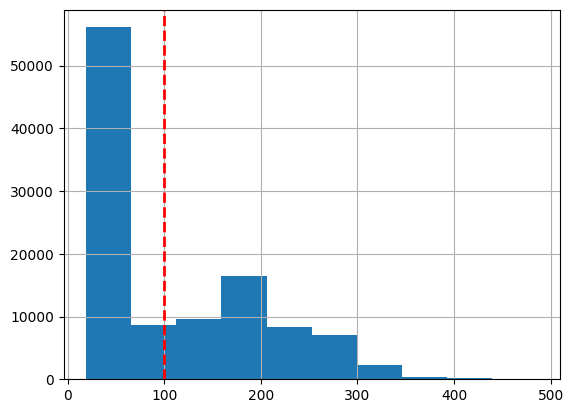

36.961


In [97]:
league[league["PitchType"] == "FourSeam"]["StuffPlus"].hist()

plt.axvline(np.mean(league[league["PitchType"] == "Sinker"]["StuffPlus"]), color='red', linestyle='dashed', linewidth=2, label='Median')
plt.show()

print(np.median(league[league["PitchType"] == "FourSeam"]["StuffPlus"]).round(3))

In [212]:
league.to_csv('~/Desktop/Random-Projects/MLB/MLB-App/NLpitches.csv', index=False)
leaguePitch.to_csv('~/Desktop/Random-Projects/MLB/MLB-App/NLleaguePitch.csv', index=False)
leagueName.to_csv('~/Desktop/Random-Projects/MLB/MLB-App/NLleagueName.csv', index=False)
leagueNameStart.to_csv('~/Desktop/Random-Projects/MLB/MLB-App/NLleagueNameStart.csv', index=False)

: 